In [25]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries (TensorFlow Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [6]:
fashion_train=pd.read_csv('fashion-mnist_train.csv')
fashion_test=pd.read_csv('fashion-mnist_test.csv')

In [7]:
fashion_train.shape

(60000, 785)

In [8]:
# Splitting features and labels
X_train_fashion = fashion_train.drop('label', axis=1)
y_train_fashion = fashion_train['label']

X_test_fashion = fashion_test.drop('label', axis=1)
y_test_fashion = fashion_test['label']

In [9]:
# Reshaping the dataset
X_train_reshape = X_train_fashion.values.reshape(-1, 28, 28)
X_test_reshape = X_test_fashion.values.reshape(-1, 28, 28)

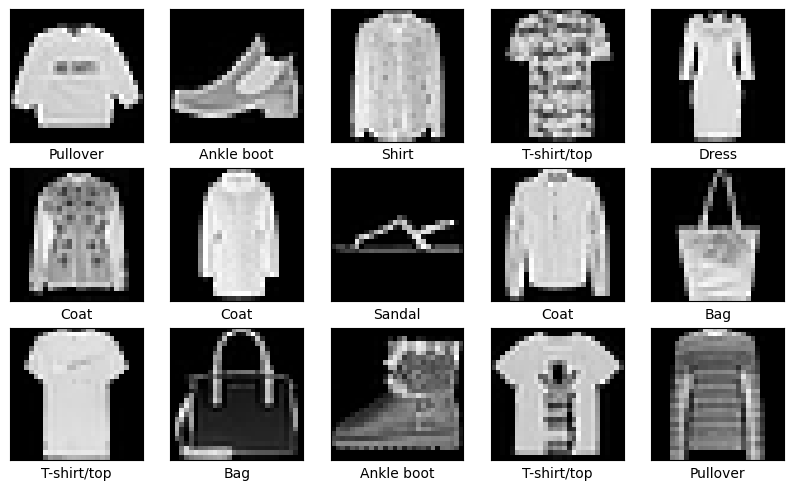

In [10]:
# Names of clothing accessories in order
col_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Visualizing the images
plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])

plt.show()

In [11]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [14]:
#Creating base neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

In [16]:
#Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
#Fitting the model
history = model.fit(
    X_train_fashion,
    y_train_fashion,
    batch_size=100,
    epochs=30,
    validation_data=(X_test_fashion, y_test_fashion)
)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.0965 - accuracy: 0.6138 - val_loss: 0.5540 - val_accuracy: 0.8132
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.7405 - accuracy: 0.7418 - val_loss: 0.4752 - val_accuracy: 0.8299
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6725 - accuracy: 0.7701 - val_loss: 0.4548 - val_accuracy: 0.8417
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6321 - accuracy: 0.7889 - val_loss: 0.4324 - val_accuracy: 0.8506
Epoch 5/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6083 - accuracy: 0.7984 - val_loss: 0.4561 - val_accuracy: 0.8541
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.5870 - accuracy: 0.8055 - val_loss: 0.4612 - val_accuracy: 0.8573
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.5847 - accuracy: 0.8069 - val_loss: 0.4440 - val_accuracy: 0.8598
Epoch 

In [18]:
#Model Evaluation
test_loss_fashion, test_acc_fashion = model.evaluate(
    X_test_fashion,
    y_test_fashion
)

print("Fashion MNIST Test accuracy:", round(test_acc_fashion, 4))

313/313 [==============================] - 0s 980us/step - loss: 0.3776 - accuracy: 0.8726
Fashion MNIST Test accuracy: 0.8726


In [19]:
#predicting labels
y_predict_fash = model.predict(X_test_fashion)

# Convert probabilities to class labels
y_predict_fash = np.argmax(y_predict_fash, axis=1)
y_test_fash_eval = np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 0s 1ms/step


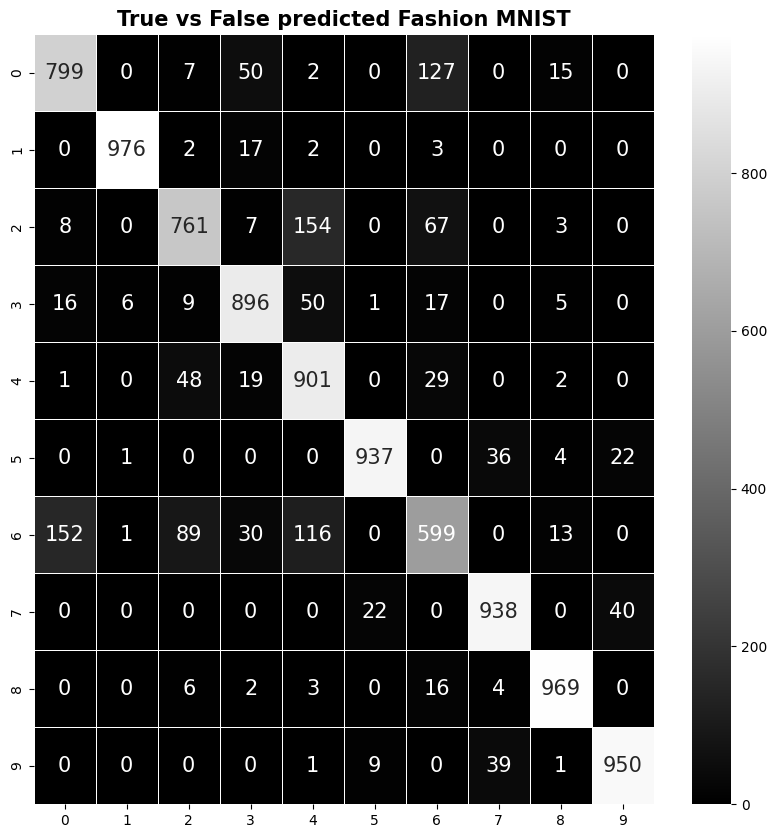

In [22]:
#Confusion Matrix
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

plt.figure(figsize=(10, 10))
sns.heatmap(
    con_mat,
    annot=True,
    annot_kws={'size': 15},
    linewidths=0.5,
    fmt='d',
    cmap='gray'
)
plt.title('True vs False predicted Fashion MNIST', fontweight='bold', fontsize=15)
plt.show()


In [26]:
#Classification report
print(classification_report(y_test_fash_eval, y_predict_fash))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.76      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.73      0.90      0.81      1000
           5       0.97      0.94      0.95      1000
           6       0.70      0.60      0.64      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [29]:
#Checking History Keys
keys = history.history.keys()
print(list(keys))

['loss', 'accuracy', 'val_loss', 'val_accuracy']


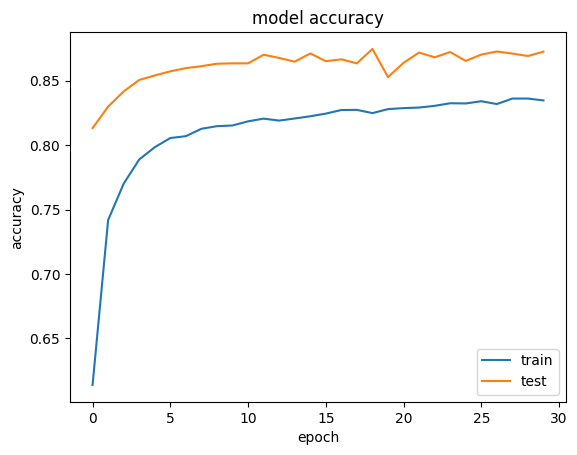

In [30]:
#plot training vs Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

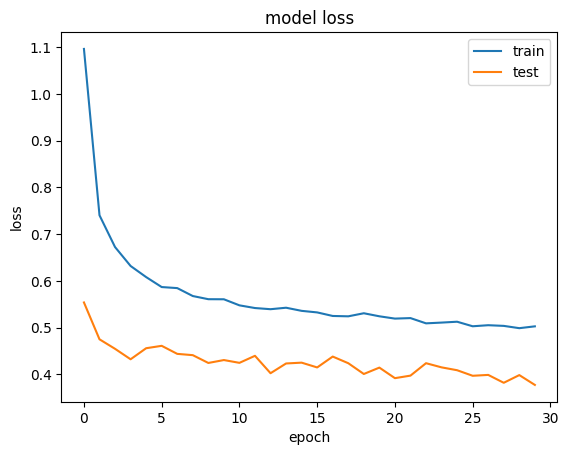

In [31]:
#Plot training vs validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

1/1 [==============================] - 0s 28ms/step


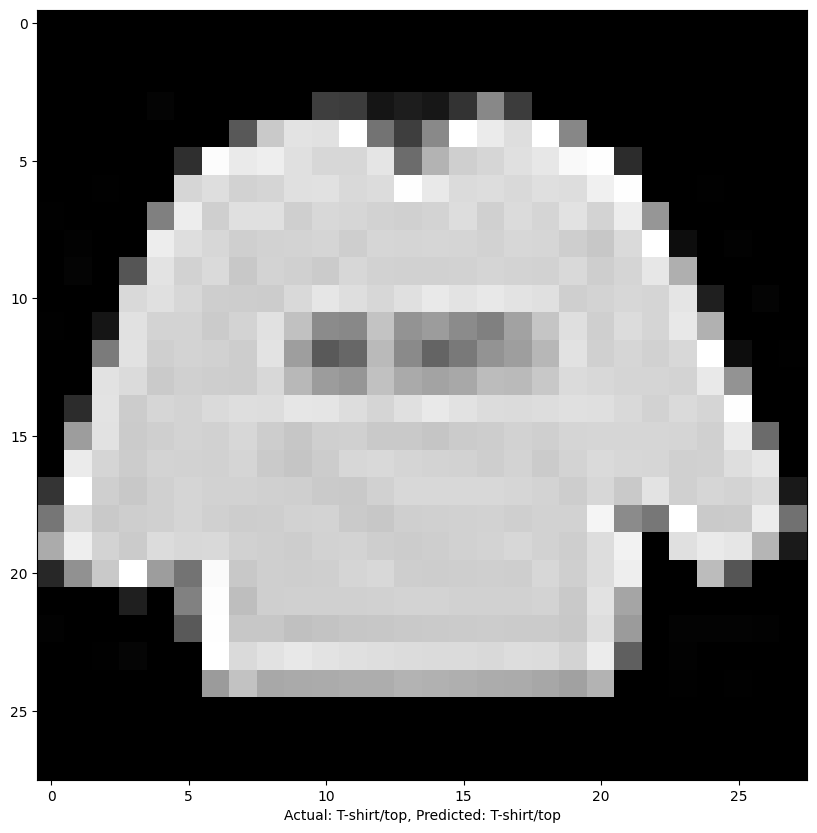

In [32]:
# Predicting a single image
y_predict = model.predict(X_test_fashion.iloc[0].values.reshape(1, -1))
y_predict = np.argmax(y_predict, axis=1)

# Names of clothing accessories
col_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10, 10))
plt.imshow(X_train_reshape[0], cmap='gray')
plt.xlabel(
    "Actual: {}, Predicted: {}".format(
        col_names[np.argmax(y_test_fashion[0])],
        col_names[y_predict[0]]
    )
)
plt.show()
